### Université de Genève - Section de Mathématiques

## Probabilités et Statiques pour Informaticiens 2022 : TP2

---

* **Exercice Choisi** : Exercice 2 -> Battage de cartes par le riffle shuffle

* **Groupes** : Nathan Vanson

---

In [1]:
# Librairies :
import random
import numpy as np
import matplotlib.pyplot as plt

---

### Exercice 2 : Battage de cartes par le riffle shuffle

1. Ecrire une fonction **RS** qui s'applique à un objet de type list, appelé **J** (il sera pratique de supposer que **J** ne contient que des valeurs 2 à 2 distinctes), qui renvoie un objet de type **list**, appelé **R**, correspondant à un riffle shuffle appliqué à **J** (**R** contient les mêmes éléments que **J** mais dans un autre ordre).

In [2]:
def RS(J: list) -> list:
    """
    Apply a Riffle Shuffle to a list to produce a new list
    
    Parameters
    ----------
      J : list
        List on which we apply the Riffle Shuffle

    Returns
    ----------
      R : list
        Riffle Shuffle result applied on J
    """
    J = list(J)
    R = []
    # Step 1
    n = len(J)
    k = np.random.binomial(n, 1/2)
    split1 = J[:k] 
    split2 = J[k:]
    
    # Step 2
    while split1 or split2: # Until the 2 packs are sold out
      n1 = len(split1)
      n2 = len(split2)

      p1 = n1/(n1+n2) # Probability of choosing in split1
      p2 = n2/(n1+n2) # Probability of choosing in split2

      chosen_list = np.random.choice(['split1', 'split2'], p=[p1, p2]) # Choose one of the two packages according to the probability
      if chosen_list == 'split1':
        popped = split1.pop()
        R.append(popped) # Add the first element of split1 in R
      elif chosen_list == 'split2':
        popped = split2.pop()
        R.append(popped) # Add the first element of split2 in R
    
    return R

# ---------- TEST ---------- #
testList1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
print(RS(testList1))
# ---------- TEST ---------- #

[9, 8, 7, 6, 3, 2, 5, 1, 4]


---

2. Ecrire une fonction **Trajectoire** qui s'applique à un objet de type **list**, appelé **J0** et à un **int** appelé **T**, qui renvoie un objet de type **list**, de longueur **T+1**, dont le premier élément est **J0** et dont les éléments se déduisent successivement les uns des autres par application de **RS**.

In [3]:
def Trajectoire(J0: list, T: int, shuffle=RS) -> np.ndarray:
    """
    Application of a trajectory on a list leaving a list whose first element is this 
    one and whose following elements are deduced successively by application of RS

    Parameters
    ----------
        J0 : list
            List in which we apply the trajectory (it also corresponds to the first element of the output list)

        T : int
            Range of the trajectory
            
        shuffle : function
            Function used to shuffle the list (default is RS)

    Returns
    ----------
        Tab : np.ndarray
            The final np array after applying the trajectory (numpy)
    """
    J0 = list(J0)
    Tab = [J0]
    #print(Tab)
    for i in range(T): # And not T+1 because J0 is the first element of the list
        Tab.append(shuffle(Tab[i]))
    return np.asarray(Tab)

# ---------- TEST ---------- #
testList2 = [1, 2, 3, 4]
T = 8
print(Trajectoire(testList2, T))
# ---------- TEST ---------- #

[[1 2 3 4]
 [2 4 3 1]
 [4 1 2 3]
 [1 3 2 4]
 [4 2 1 3]
 [4 3 1 2]
 [1 3 2 4]
 [3 4 2 1]
 [1 2 4 3]]


---

#### LES QUESTIONS 3 ET 4 SONT TRAITÉS EN MÊME TEMPS

3. On a donc une fonction qui, à un ordre initial, que l'on choisira ```python: J0=range(n)```, pour $n = 52$, associe la suite $J0, J1 = RS(J0),...,J_{(t-1)} = RS(J_t),...,J_T$, de ses riffle shuffle successifs. On cherche à mesurer comment la loi de $J_t$ se rapproche de la loi uniforme sur l'ensemble des permutations de {$0,...,n-1$} lorsque $t$ augmente. Si la loi de $J_t$ était la loi uniforme sur l'ensemble des permutations de {$0,...,n-1$}, alors la loi de chaque coordonnée de $J_t(k)$ serait la loi uniforme sur {$0,...,n-1$}, càd que l'on aurait, pour tous $k$, $i$,

$$\mathbb{P}(J_t(k) = i) = \frac{1}{n}$$

On va alors mesurer le caractère uniforme de la distribution de $J_t$ avec l'indicateur :

$$I(J_t) := \max(\lvert n*P(J_t(k) = i) -1 \rvert, (k, i) \in (0,...,n-1)^2)$$

Calculer, pour $n = 52$, $T = 10$, une estimation de $\hat{I}(J_t)$ pour $t \in (0,...,T)$, afficher le graphe de $\hat{I}(J_t)$ en fonction de $t$ et donner le t minimal permettant d'avoir $I(J_t) < 1$ (si un tel $t$ est trouvé).

*Indication :* Pour estimer $\mathbb{P}(J_t(k) = i)$, on simulera un grand nombre de trajectoires et on pourra utiliser, par exemple, la fonction ```python: np.bincount```.

4. Pour $J_(unif)$ une permutation aléatoire uniforme de ```python: J0=range(n)```, on a $I(J_(unif)) = 0$. Néanmoins, ce à quoi il est légitime de comparer les estimations $\hat{I}(J_t)$ n'est pas $I(J_(unif))$ mais l'estimation $\hat{I}(J_(unif))$ obtenue avec un échantillon de même taille de permutations aléatoires uniformes indépendantes. Dans le même programme, calculer cette estimation $\hat{I}(J_(unif))$ et faire apparaître, sur le graphique précédent, une ligne horizontale d'ordonnée $\hat{I}(J_(unif))$.

*Indication :* Pour simuler des permutations aléatoires uniformes indépendantes, on pourra utiliser ```python: np.randon.shuffle```.

Valeur de t minimum pour I(Jt) < 1 :  2


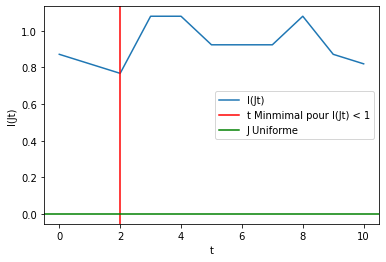

In [5]:
# ---------- VALEURS ---------- #
n = 52
J0 = range(n)
Ju = np.arange(n)
T = 10
Tk = 1000
J = Trajectoire(J0, T)
# ---------- VALEURS ---------- #

# ---------- QUESTIONS 3 / 4 ---------- #
I_Values = []
for Jt in J:
    Jt = Trajectoire(Jt, Tk)
    P = np.asarray([np.bincount(Jt[:, k], minlength=n)/Tk for k in range(n)])
    Pu = np.asarray([np.bincount(Ju, minlength=n)/n for k in range(n)])
    I_Values.append(np.max(np.abs(n * P - 1)))
    
    np.random.shuffle(Ju) # Uniform random permutations

t = np.where(I_Values[np.argmin(I_Values)] < 1, np.argmin(I_Values), None) # Minimal t
print("Valeur de t minimum pour I(Jt) < 1 : ", t)

I_u = np.max(np.abs(n * Pu - 1))
# ---------- QUESTIONS 3 / 4 ---------- #

# ---------- GRAPHIC ---------- #
plt.plot(I_Values, label = 'I(Jt)')
plt.axvline(t, color = 'r', label = 't Minmimal pour I(Jt) < 1')
plt.axhline(I_u, color = 'g', label = 'J Uniforme')
plt.xlabel("t")
plt.ylabel("I(Jt)")
plt.legend() 
plt.show()
# ---------- GRAPHIC ---------- #